<a href="https://colab.research.google.com/github/pyrdna85/Ciencia-de-dados/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROJETO EM GOVERNANÇA DE TI**
**Análise de dados:**
Acidentes Aéreos Ocorridos no Brasil de 2010 a 2019



O CENTRO DE INVESTIGAÇÃO E PREVENÇÃO DE ACIDENTES AERONÁUTICOS (CENIPA)

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Importação dataset
data = pd.read_csv("https://raw.githubusercontent.com/EdsonMSouza/08_T22_QUI_N/main/CENIPA/ocorrencias_cenipa.csv",sep =';',encoding='ISO-8859-1')
print(data.head())


   codigo             tipo  ... aeronave_fase_operacao aeronave_nivel_dano
0   40107         ACIDENTE  ...                  POUSO                LEVE
1   40147         ACIDENTE  ...                  POUSO         SUBSTANCIAL
2   40148         ACIDENTE  ...      APROXIMAÇÃO FINAL         SUBSTANCIAL
3   40149         ACIDENTE  ...              DECOLAGEM           DESTRUÍDA
4   40150  INCIDENTE GRAVE  ...                  POUSO                LEVE

[5 rows x 21 columns]


###**Limpeza de dados**

In [44]:
data.isnull().sum()

codigo                       0
tipo                         0
descricao                    0
cidade                       0
estado                       0
data                         0
ano                          0
hora                         0
aeronave_liberada            0
status_investigacao          0
aeronaves_envolvidas         0
ocorrencia_saida_pista       0
aeronave_tipo                0
aeronave_fabricante          0
motor_tipo                   0
aeronave_motor_quantidade    0
aeronave_assentos            0
aeronave_ano_fabricacao      0
aeronave_pais_fabricante     0
aeronave_fase_operacao       0
aeronave_nivel_dano          0
dtype: int64

###**Verificando informações do conjunto de dados**

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

###**Descrição**

In [97]:
print(data.describe())

             codigo          ano  ...  aeronave_assentos  aeronave_ano_fabricacao
count   5242.000000  5242.000000  ...        5242.000000              5242.000000
mean   56472.458985  2014.180847  ...          27.575353              1863.320870
std    13045.616926     2.849750  ...          54.528085               507.051481
min    39115.000000  2010.000000  ...           0.000000                 0.000000
25%    46024.500000  2012.000000  ...           2.000000              1978.000000
50%    51693.500000  2014.000000  ...           6.000000              1992.000000
75%    66450.750000  2017.000000  ...          10.000000              2007.000000
max    79227.000000  2019.000000  ...         384.000000              9999.000000

[8 rows x 5 columns]


###**Verificando o número de linhas e colunas**

In [48]:
print("Este Dataset contem {} linhas e {} colunas.".format(data.shape[0],data.shape[1]))

Este Dataset contem 5242 linhas e 21 colunas


###**Contagem dos aviões por tipo de motor**

Representação gráfica.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


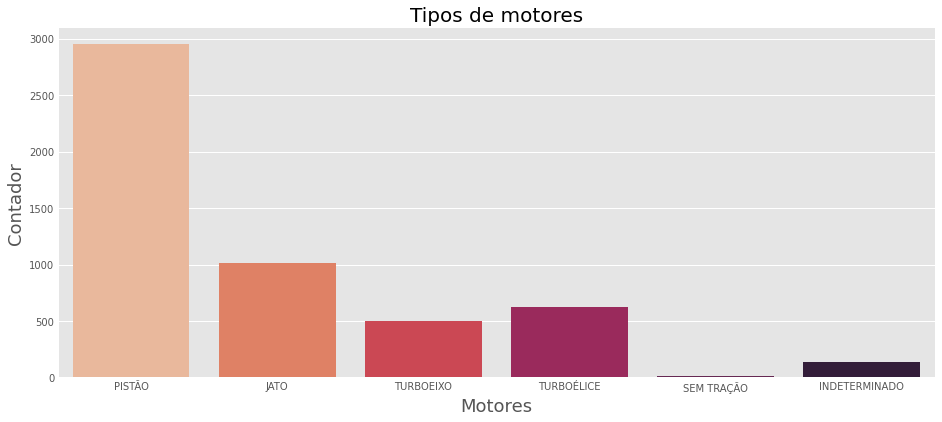

In [64]:
plt.figure(figsize=(14,6))
plt.style.use('ggplot')
ax= sns.countplot('motor_tipo', data=data , palette = 'rocket_r')
ax.set_xlabel(xlabel= "Motores",fontsize=18)
ax.set_ylabel(ylabel = "Contador", fontsize = 18)
ax.set_title(label = "Tipos de motores", fontsize = 20)
plt.show()

Verificação dos dados numéricos.

In [96]:
print(data.groupby(['motor_tipo']). agg({'aeronaves_envolvidas':'sum'}))

               aeronaves_envolvidas
motor_tipo                         
INDETERMINADO                   134
JATO                           1031
PISTÃO                         2979
SEM TRAÇÃO                       19
TURBOEIXO                       509
TURBOÉLICE                      632


###**Ano dos acidentes**

Text(0, 0.5, 'Ano')

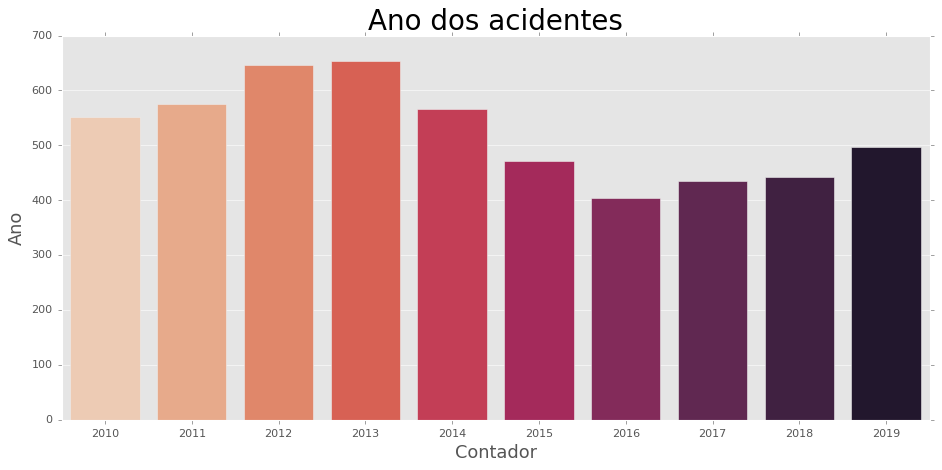

In [99]:
plt.style.use('ggplot')
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "ano", data = data, palette = "rocket_r")
ax.set_title("Ano dos acidentes", fontsize = 25)
ax.set_xlabel("Contador", fontsize = 16)
ax.set_ylabel("Ano", fontsize = 16)

Verificação dos dados numéricos.

In [95]:
print(data.groupby(['ano']). agg({'aeronaves_envolvidas':'sum'}))

      aeronaves_envolvidas
ano                       
2010                   553
2011                   584
2012                   651
2013                   659
2014                   578
2015                   472
2016                   413
2017                   438
2018                   454
2019                   502


###**Países fabricantes**

Text(0, 0.5, 'Contador')

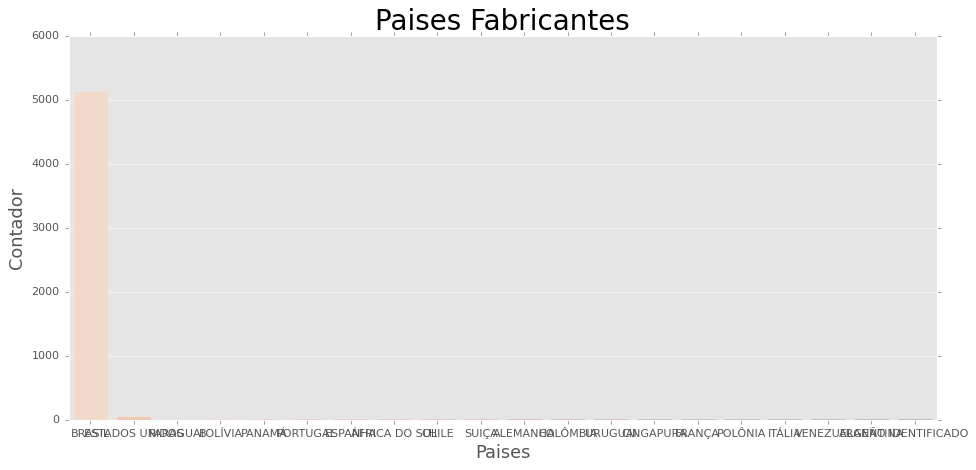

In [93]:
plt.style.use('ggplot')
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "aeronave_pais_fabricante", data = data, palette = "rocket_r")
ax.set_title("Paises Fabricantes", fontsize = 25)
ax.set_xlabel("Paises", fontsize = 16)
ax.set_ylabel("Contador", fontsize = 16)

Verificação dos dados numéricos.

In [94]:
print(data.groupby(['aeronave_pais_fabricante']). agg({'aeronaves_envolvidas':'sum'}))

                          aeronaves_envolvidas
aeronave_pais_fabricante                      
ALEMANHA                                     3
ARGENTINA                                    3
BOLÍVIA                                      4
BRASIL                                    5198
CHILE                                        5
CINGAPURA                                    1
COLÔMBIA                                     2
ESPANHA                                      3
ESTADOS UNIDOS                              50
FRANÇA                                       2
ITÁLIA                                       1
NÃO IDENTIFICADO                            11
PANAMÁ                                       2
PARAGUAI                                     8
POLÔNIA                                      2
PORTUGAL                                     5
SUIÇA                                        1
URUGUAI                                      1
VENEZUELA                                    1
ÁFRICA DO SUL

###**Tipo das aeronaves envolvidas**

Text(0, 0.5, 'Contador')

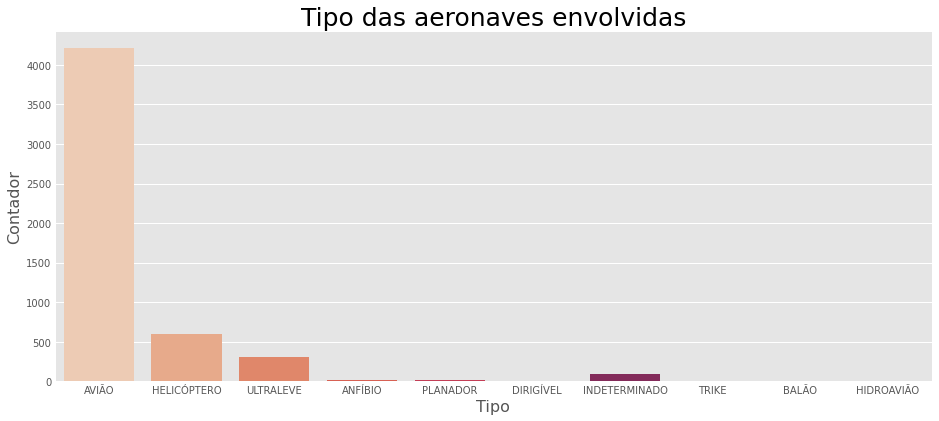

In [78]:
plt.style.use('ggplot')
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "aeronave_tipo", data = data, palette = "rocket_r")
ax.set_title("Tipo das aeronaves envolvidas", fontsize = 25)
ax.set_xlabel("Tipo", fontsize = 16)
ax.set_ylabel("Contador", fontsize = 16)

Verificação dos dados numéricos.

In [101]:
print(data.groupby(['aeronave_tipo']). agg({'aeronaves_envolvidas':'sum'}))

               aeronaves_envolvidas
aeronave_tipo                      
ANFÍBIO                          12
AVIÃO                          4255
BALÃO                             1
DIRIGÍVEL                         2
HELICÓPTERO                     609
HIDROAVIÃO                        1
INDETERMINADO                    87
PLANADOR                         19
TRIKE                             5
ULTRALEVE                       313


Text(0, 0.5, 'Product Line')

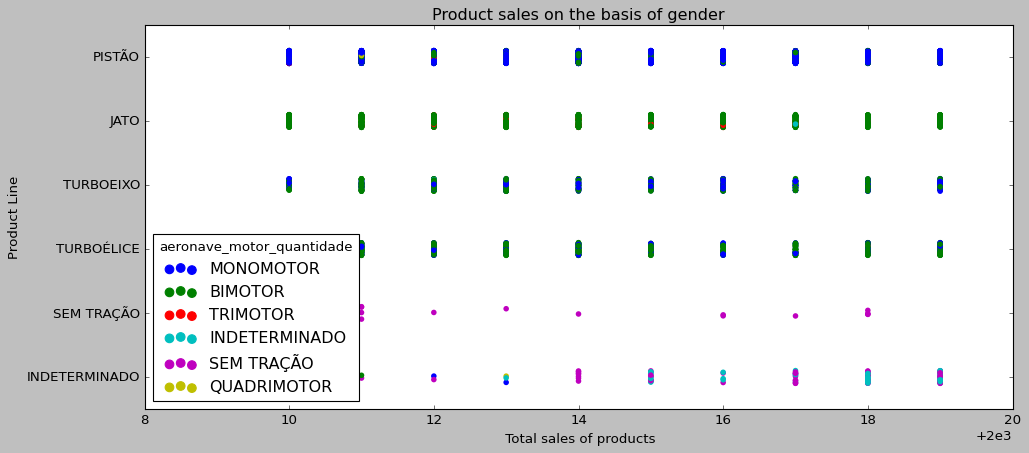

In [86]:
plt.style.use('classic')
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "motor_tipo", x = "ano", hue = "aeronave_motor_quantidade", data = data)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")